In [1]:
import polymetric
import matplotlib.pyplot as plt
import numpy as np
from importlib import reload

reload(polymetric)

<module 'polymetric' from '/Users/jesse/Code/polymetric/polymetric/__init__.py'>

In [2]:
def plot_polys(polys, cycle_colours=False, **kw):
    single_color = None
    for i, poly in enumerate(polys):
        xs, ys = poly.exterior.xy
        plot_params = dict(kw)
        
        if cycle_colours:
            plot_params["color"] = "C%d" % (i % 10)
        elif single_color is not None:
            plot_params["color"] = single_color
            
        l = plt.plot(xs, ys, **plot_params)
        if single_color is None:
            single_color = l[0].get_color()
            plot_params["color"] = single_color
        
        # plot interiors with a different line style
        plot_params["linestyle"] = "--"
        for interior in poly.interiors:
            xs, ys = interior.xy
            plt.plot(xs, ys, **plot_params)
            
def show_polys():
    plt.axes().set_aspect('equal')
    plt.show()

In [3]:
c1 = polymetric.Circle(name="c1", r=5)
c2 = polymetric.Circle(name="c2", r=lambda get_param: get_param("d") / 2.0, d=10)

In [4]:
poly_c1 = c1.polygonize()
poly_c2 = c2.polygonize()

In [5]:
c1.get_param("n_sectors")

24

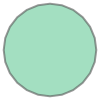

In [6]:
poly_c2[0]

In [7]:
r1 = polymetric.Rectangle(name="r1", w=5.0, h=2.0)

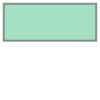

In [8]:
r1.polygonize()[0]

In [9]:
burp = {"lala": True, "yoyo": 1}

In [10]:
burp["lala"] is True

True

In [11]:
ps1 = polymetric.ParametricSweep(
    constructor=polymetric.Circle,
    sweep_over=np.arange(3),
    sweep_params = {
        "x": True,
        "y": lambda i: i**2
    },
    fixed_params = {
        "r": 0.5
    },
)

In [12]:
ps1.build()

In [13]:
tc1A = c1.apply(polymetric.Translated, offset=(1.0, 0.0)).apply(polymetric.Scaled, scales=(0.7, 0.7))
tc1B = c1.apply(polymetric.Translated, offset=(1.0, 0.0)).apply(polymetric.Scaled, scales=(0.7, 0.7), origin="center")

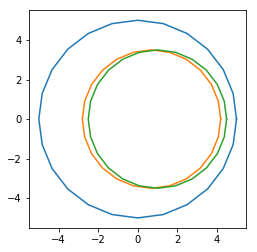

In [14]:
plt.figure()
plot_polys(poly_c1)
plot_polys(tc1A.polygonize())
plot_polys(tc1B.polygonize())
show_polys()


In [15]:
ps1_polys = ps1.polygonize()

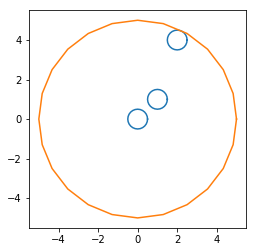

In [16]:
plt.figure()
plot_polys(ps1_polys)
plot_polys(poly_c2)
plt.axes().set_aspect('equal')
plt.show()

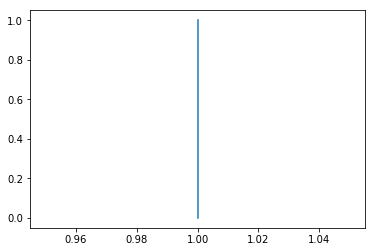

In [17]:
plt.figure()
l = plt.plot([1,1],[0,1])
plt.show()

In [18]:
ll = l[0]

In [19]:
ll.get_color()

'#1f77b4'

In [20]:
import shapely as sp
import shapely.ops
import shapely.geometry

In [21]:
united_ps1_polys = sp.ops.cascaded_union(ps1_polys)
poly_diff = [poly_c2[0].difference(united_ps1_polys)]

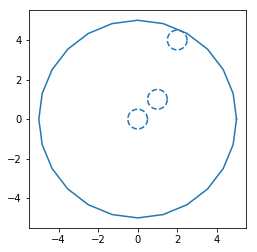

In [22]:
plt.figure()
plot_polys(poly_diff)
plt.axes().set_aspect('equal')
plt.show()

In [23]:
poly_diff[0].int

AttributeError: 'Polygon' object has no attribute 'int'

In [ ]:
c1.